# Salesforce/BLIP Image Captioning Large

BLIPは、ビジョン言語理解と生成タスクの両方に対して柔軟に適応可能な新しいビジョン言語事前学習（VLP）フレームワークです。ウェブから収集されたノイズの多いイメージテキストペアを効果的に利用し、キャプションの生成とフィルタリングによりデータ品質を向上させています。画像テキスト検索、画像キャプション、VQA（視覚的質問応答）など幅広いタスクで最先端の成果を達成し、ビデオ言語タスクへのゼロショット転送においても強力な一般化能力を示しています。
- HuggingFace：https://huggingface.co/Salesforce/blip-image-captioning-large

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/vision_language_model/salesforce_blip-image-captioning-large.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install sentencepiece
!pip install transformers

In [17]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

from PIL import Image
from io import BytesIO
import requests

device = "cuda" if torch.cuda.is_available() else "cpu"

### データの用意

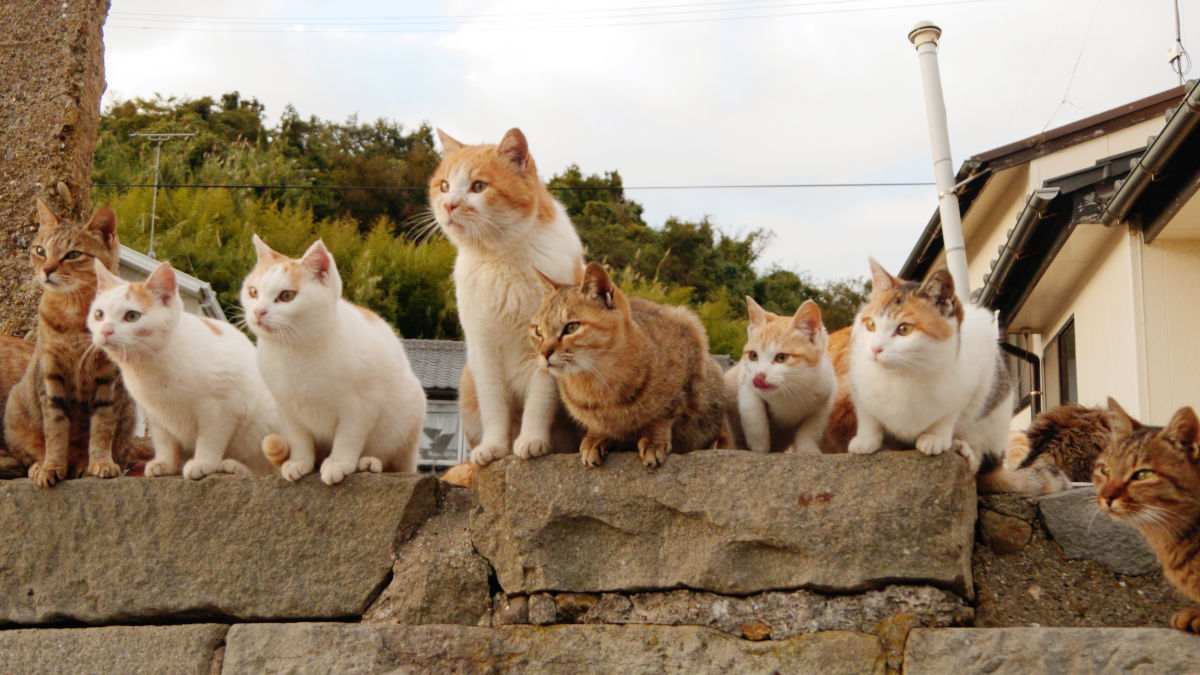

In [24]:
url = "https://raw.githubusercontent.com/fuyu-quant/data-science-wiki/develop/images/cat.jpeg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

### BLIPのダウンロード

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")
model.to(device)

In [26]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

several cats sitting on a stone wall in front of a house
